## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

X = pd.DataFrame(housing.data, columns = housing.feature_names)
y = pd.DataFrame(housing.target, columns = ['MedHouseVal'])

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [65]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
regr_1 = DecisionTreeRegressor(max_depth=4)

In [7]:
regr_1.fit(X_train, y_train);

In [8]:
r2_1 = regr_1.score(X_test, y_test)
print(f' O R² da árvore com profundidade {regr_1.get_depth()} na base teste é: {round(r2_1, 2)}')

 O R² da árvore com profundidade 4 na base teste é: 0.57


In [9]:
mse_1 = mean_squared_error(y_test , regr_1.predict(X_test))
print(f'O MSE da árvore com profundidade 4 na base de dados é: {round(mse_1, 2)}')

O MSE da árvore com profundidade 4 na base de dados é: 0.57


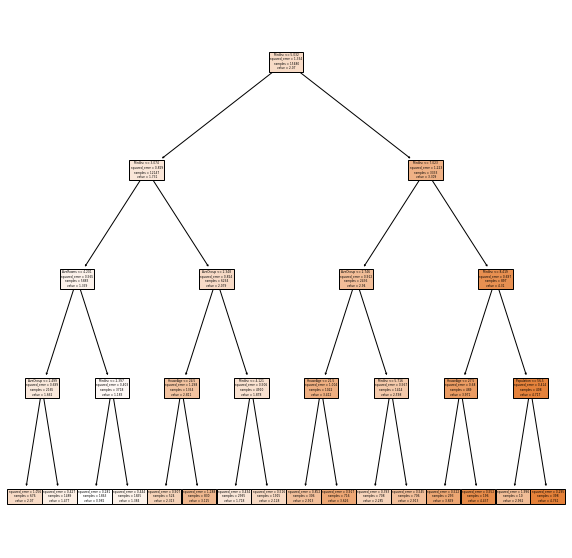

In [71]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [10]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)

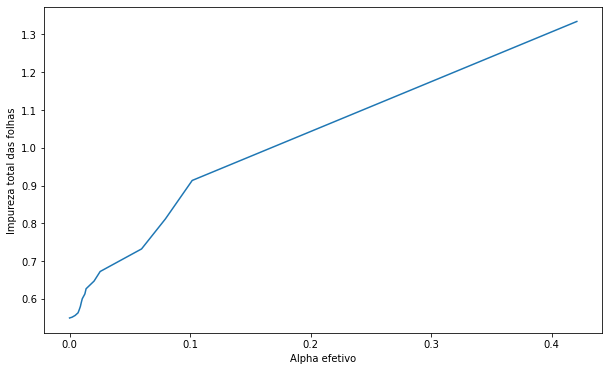

In [11]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel('Alpha efetivo')
plt.ylabel('Impureza total das folhas');

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [23]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [22]:
clfs

[DecisionTreeRegressor(random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.0020394090238695702, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.004599747579211139, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.007049197242594479, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.008008565557093589, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.008982629781385594, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.009687407685612534, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.010546411759549568, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.012698275003232867, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.013700966310009943, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.020318936246766506, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.025387869656735368, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.05971185153298236, random_state=42),
 DecisionTreeRegressor(ccp_alpha=0.07951404855965313, random_state=42),
 DecisionTr

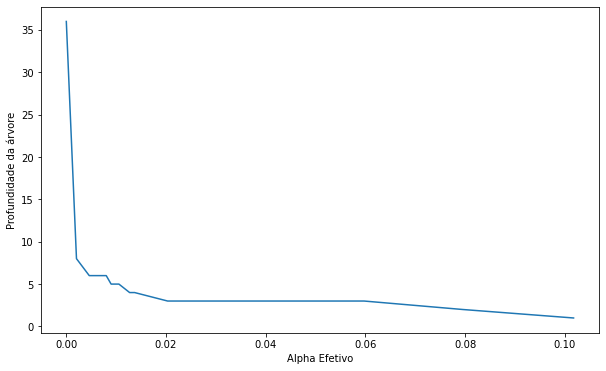

In [13]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel('Alpha Efetivo')
plt.ylabel('Profundidade da árvore');

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [14]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

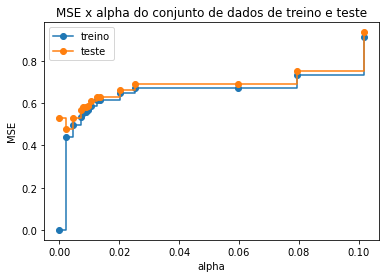

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x alpha do conjunto de dados de treino e teste')
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [24]:
arvore_0015 = DecisionTreeRegressor(random_state=42, ccp_alpha=0.015)
arvore_0015.fit(X_train, y_train);



In [25]:
print(f'Arvore alpha 0.015 Profundidade: {arvore_0015.tree_.max_depth}')
print(f'R² da arvore alpha 0.015 na base de teste: {arvore_0015.score(X_test, y_test):.2f}')
print(f'MSE da arvore alpha 0.015 na base de teste: {mean_squared_error(y_test, arvore_0015.predict(X_test)):.2f}')

Arvore alpha 0.015 Profundidade: 3
R² da arvore alpha 0.015 na base de teste: 0.51
MSE da arvore alpha 0.015 na base de teste: 0.65


In [26]:
arvore_0006 = DecisionTreeRegressor(random_state=42, ccp_alpha=0.006)
arvore_0006.fit(X_train, y_train);

In [27]:
print(f'Arvore alpha 0.006 Profundidade: {arvore_0006.tree_.max_depth}')
print(f'R² da arvore alpha 0.006 na base de teste: {arvore_0006.score(X_test, y_test):.2f}')
print(f'MSE da arvore alpha 0.006 na base de teste: {mean_squared_error(y_test, arvore_0006.predict(X_test)):.2f}')

Arvore alpha 0.006 Profundidade: 6
R² da arvore alpha 0.006 na base de teste: 0.58
MSE da arvore alpha 0.006 na base de teste: 0.55


### 7. Visualize esta árvore.

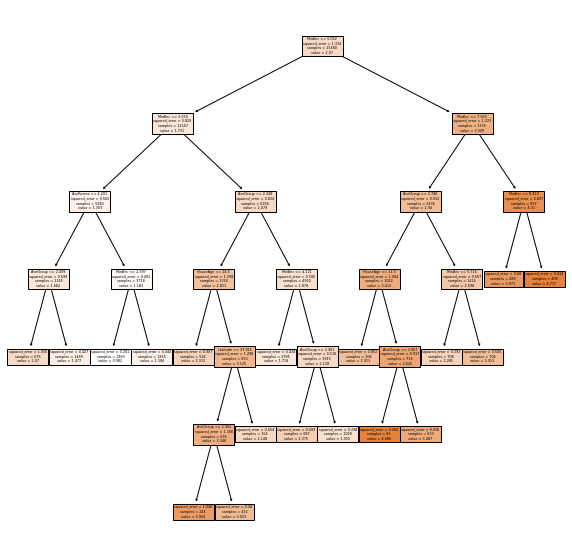

In [28]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_0006, 
                    feature_names=X.columns,  
                    filled=True)